In [8]:
import numpy as np
import scipy
from scipy.stats import beta
from matplotlib import pyplot as plt
%matplotlib notebook
plt.rcParams['figure.dpi'] = 120

In [9]:
def Beta_binomial(N_1, N_0, a, b):
    fig, ax = plt.subplots(1, 1)
    plt.xlabel(r"$\dot{\theta}$")
    plt.xlim(0,1)
    plt.ylim(0.5,7)

    x = np.linspace(beta.ppf(0.01, a, b),
                  beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='prior')

    x = np.linspace(beta.ppf(0.01, N_1, N_0),
                  beta.ppf(0.99, N_1, N_0), 100)
    ax.plot(x, beta.pdf(x, N_1, N_0), lw=2, alpha=0.6, label='likelihood')
    
    x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
                  beta.ppf(0.99, a+N_1, b+N_0), 100)
    ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='posterior')
    
    
    mean, var, skew, kurt = beta.stats(a+N_1, b+N_0, moments='mvsk')
    plt.axvline(mean, color = "red")#, label = "Mean Posterior")
    MedianPosterior = beta(a+N_1, b+N_0).median()
    plt.axvline(MedianPosterior, color = "green")#, label = "Mode Posterior")

#     plt.plot(-1, 1, color = "navyblue", label = "Mode Posterior")


    print("Mean:", np.round(mean,2))

#    print("Variance:", np.round(var,2))
#    print("Mode:", np.round(MedianPosterior,2))
    
    plt.legend()
    plt.show()

# Define hyper-parameters and sufficient data

In [10]:
#Experiment 1 
N_1 = 3 #Number of heads in experiment
N_0 = 10 #Number of tails in experiment
hyperparameter_values = [(1,1),(4,2),(2,6),(16,8)]

In [11]:
#Experiment 2
N_1 = 40 #Number of heads in experiment
N_0 = 20 #Number of tails in experiment
hyperparameter_values = [(1,1),(7,7),(2,6),(16,8)]

# Plot prior, likelihood and posterior for each hyperparameter pair 

In [12]:
for i in range(len(hyperparameter_values)):
    Beta_binomial(N_1,N_0,hyperparameter_values[i][0], hyperparameter_values[i][1])

<IPython.core.display.Javascript object>

Mean: 0.66
Mean: 0.64
Mean: 0.62
Mean: 0.67


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot the prior probabilities and the likelihood of the four cases

In [13]:
fig, ax = plt.subplots(1, 1)
plt.xlabel(r"$\dot{\theta}$")
plt.xlim(0,1)
plt.ylim(0.5,7)

#Likelihood
a, b = N_1, N_0

x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='likelihood')

#Case 1
a, b = 1, 1

x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='uniform prior')

#Case 2
a, b = 7, 7
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='moderate fair prior')

#Case 3
a, b = 2, 6
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='weak unfair (tails) prior')

#Case 4
a, b = 16, 8
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='strong unfair (heads) prior')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

# Plot the posterior probabilities and the likelihood of the four cases

In [14]:
fig, ax = plt.subplots(1, 1)
plt.xlabel(r"$\dot{\theta}$")
plt.xlim(0,1)
plt.ylim(0.5,7)

#Likelihood
a, b = N_1, N_0
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='likelihood')

#Case 1
a, b = 1, 1

x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case1: posterior')

#Case 2
a, b = 7, 7
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case2: posterior')
#Case 3
a, b = 2, 6
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case3: posterior')
#Case 4
a, b = 16, 8
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case4: posterior')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [16]:
def Beta_binomial(N_1, N_0, a, b):
    fig, ax = plt.subplots(1, 1)
    plt.xlabel(r"$\dot{\theta}$")
    plt.xlim(0,1)
    plt.ylim(0.5,7)

    x = np.linspace(beta.ppf(0.01, a, b),
                  beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='prior')

    x = np.linspace(beta.ppf(0.01, N_1, N_0),
                  beta.ppf(0.99, N_1, N_0), 100)
    ax.plot(x, beta.pdf(x, N_1, N_0), lw=2, alpha=0.6, label='likelihood')
    
    x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
                  beta.ppf(0.99, a+N_1, b+N_0), 100)
    ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='posterior')
    
    
    mean, var, skew, kurt = beta.stats(a+N_1, b+N_0, moments='mvsk')
    plt.axvline(mean, color = "red")#, label = "Mean Posterior")
    MedianPosterior = beta(a+N_1, b+N_0).median()
    plt.axvline(MedianPosterior, color = "green")#, label = "Mode Posterior")

#     plt.plot(-1, 1, color = "navyblue", label = "Mode Posterior")


    print("Mean:", np.round(mean,2))

#    print("Variance:", np.round(var,2))
#    print("Mode:", np.round(MedianPosterior,2))
    
    plt.legend()
    plt.show()

# Define hyper-parameters and sufficient data

In [17]:
#Experiment 1 
N_1 = 3 #Number of heads in experiment
N_0 = 10 #Number of tails in experiment
hyperparameter_values = [(1,1),(4,2),(2,6),(16,8)]

In [18]:
#Experiment 2
N_1 = 40 #Number of heads in experiment
N_0 = 20 #Number of tails in experiment
hyperparameter_values = [(1,1),(7,7),(2,6),(16,8)]

# Plot prior, likelihood and posterior for each hyperparameter pair 

<IPython.core.display.Javascript object>


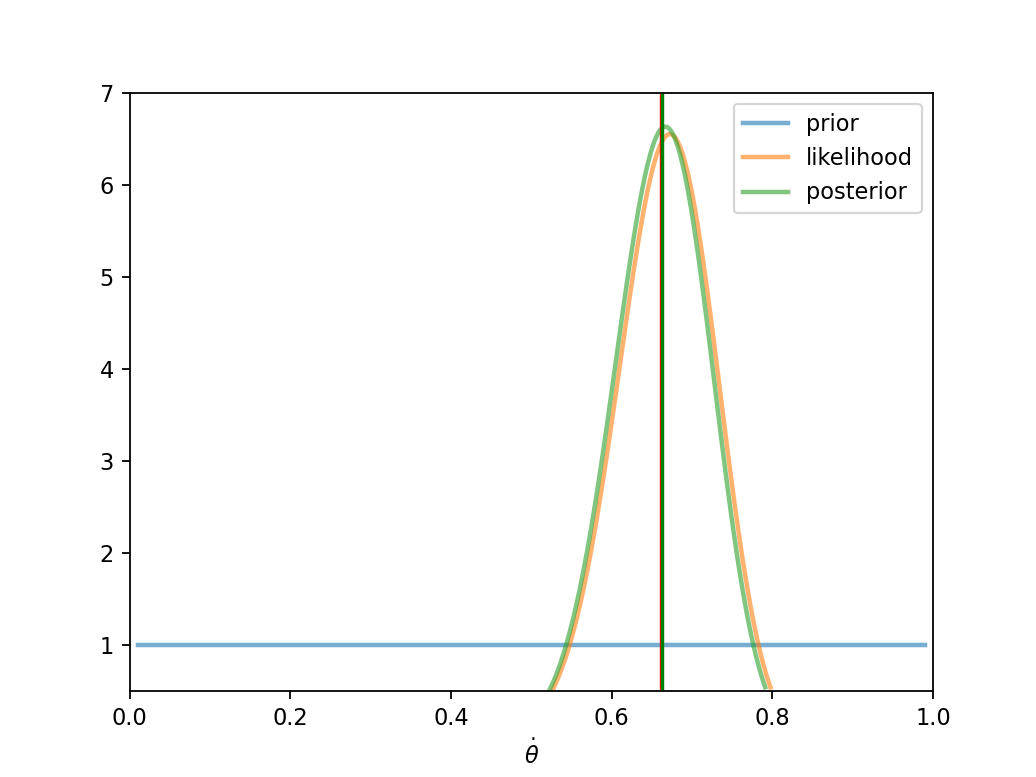

Mean: 0.66


<IPython.core.display.Javascript object>


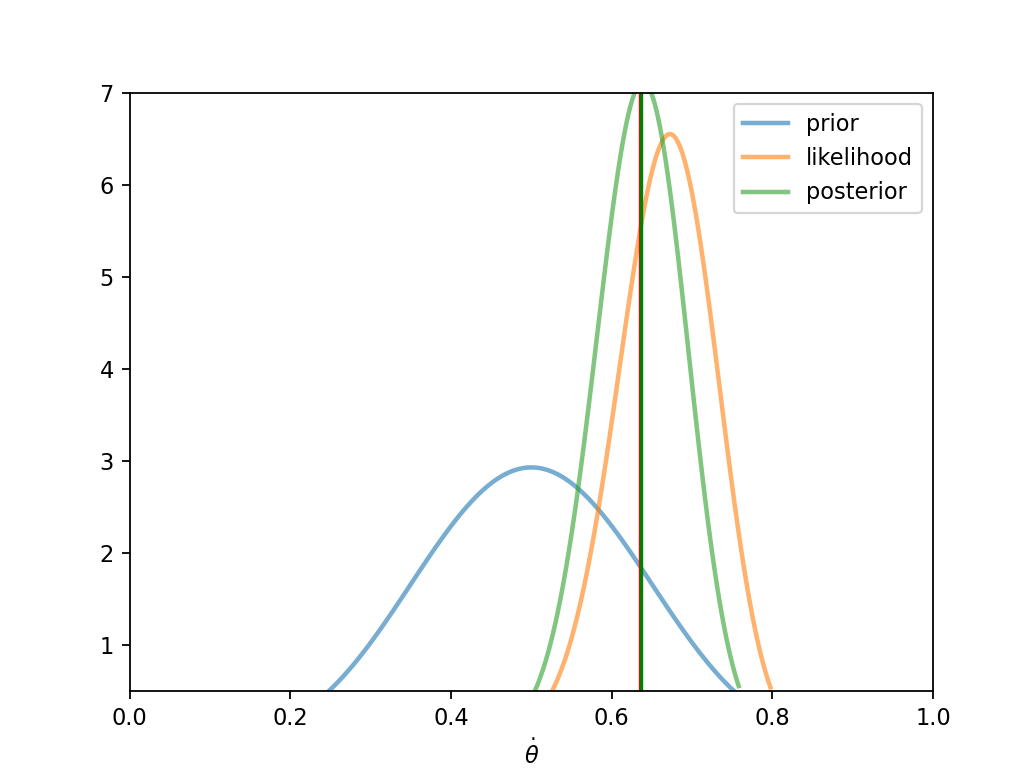

Mean: 0.64


<IPython.core.display.Javascript object>


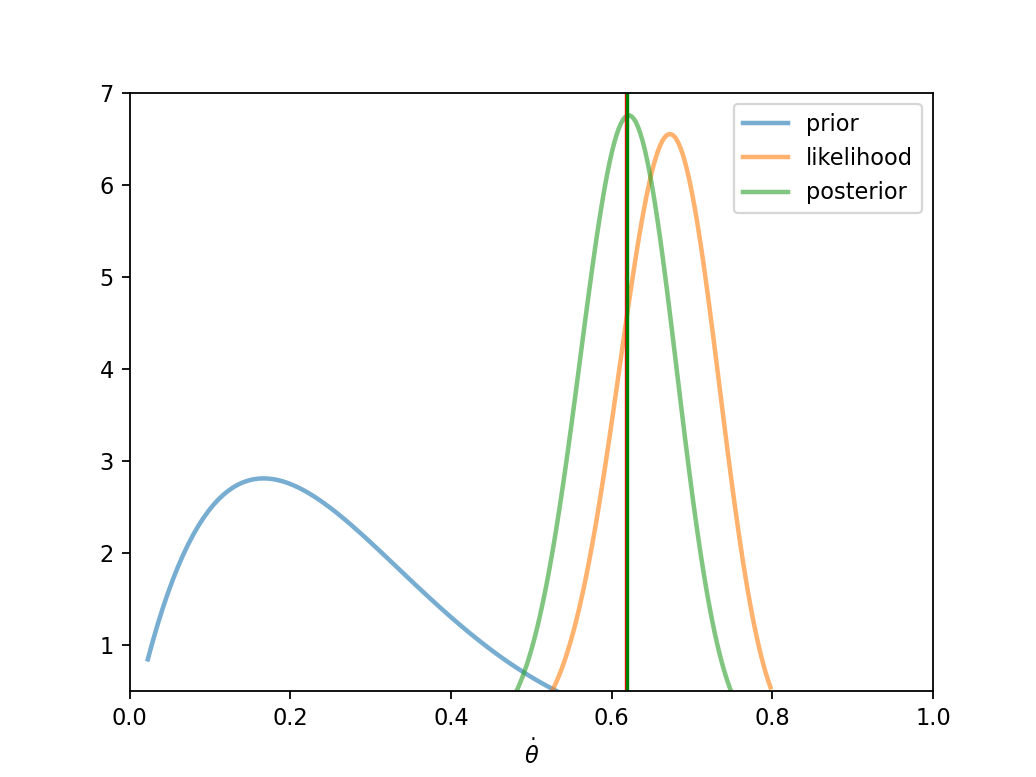

Mean: 0.62


<IPython.core.display.Javascript object>


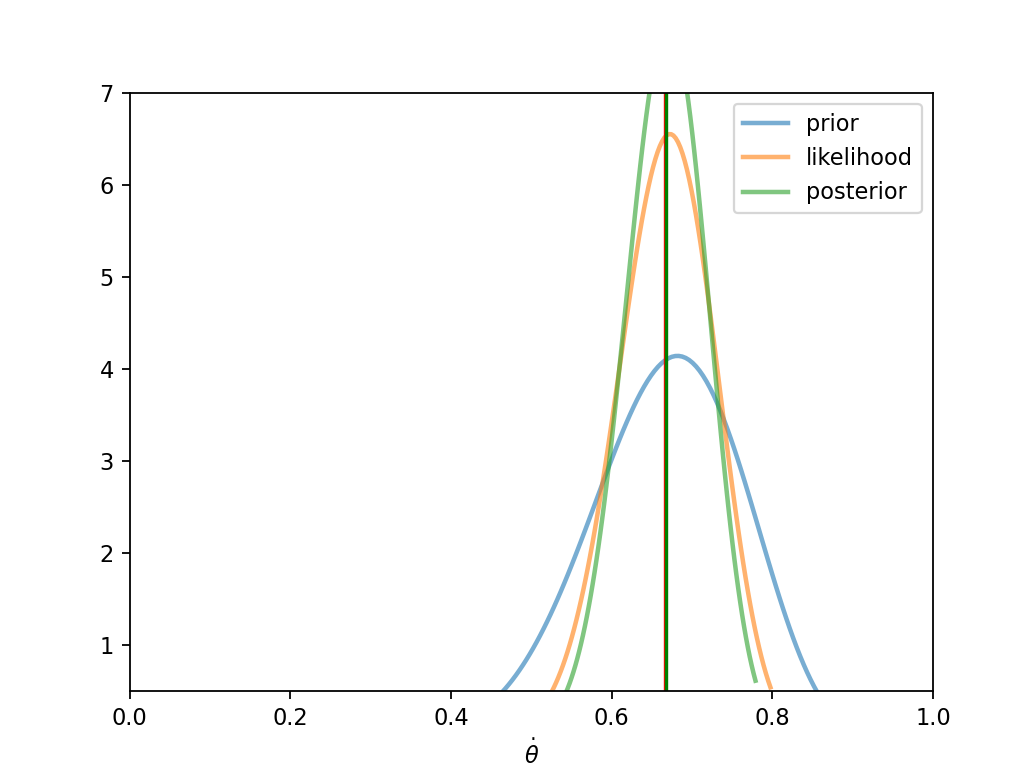

Mean: 0.67


In [19]:
for i in range(len(hyperparameter_values)):
    Beta_binomial(N_1,N_0,hyperparameter_values[i][0], hyperparameter_values[i][1])

# Plot the prior probabilities and the likelihood of the four cases

<IPython.core.display.Javascript object>


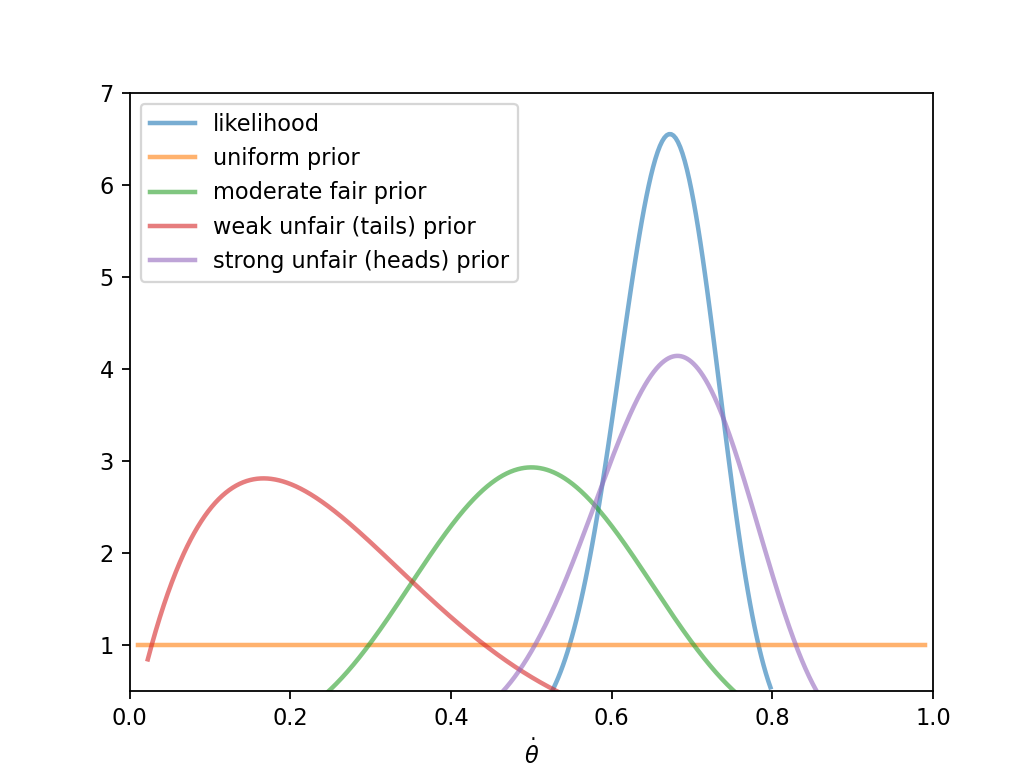

In [20]:
fig, ax = plt.subplots(1, 1)
plt.xlabel(r"$\dot{\theta}$")
plt.xlim(0,1)
plt.ylim(0.5,7)

#Likelihood
a, b = N_1, N_0

x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='likelihood')

#Case 1
a, b = 1, 1

x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='uniform prior')

#Case 2
a, b = 7, 7
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='moderate fair prior')

#Case 3
a, b = 2, 6
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='weak unfair (tails) prior')

#Case 4
a, b = 16, 8
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='strong unfair (heads) prior')

plt.legend()
plt.show()

# Plot the posterior probabilities and the likelihood of the four cases

<IPython.core.display.Javascript object>


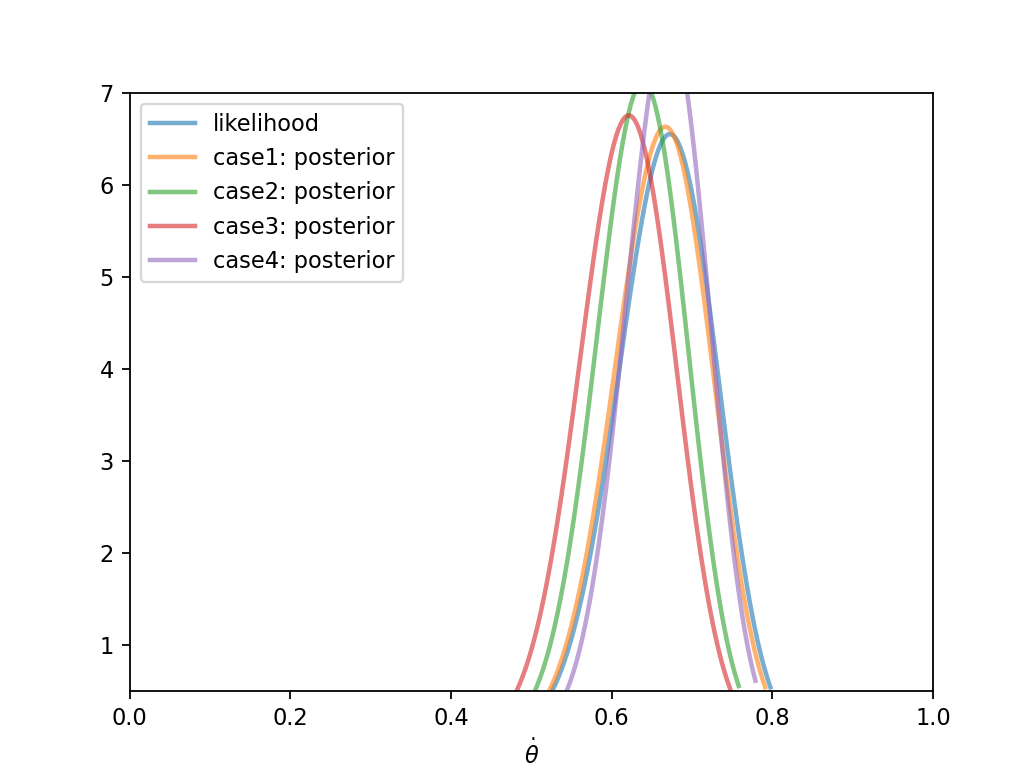

In [21]:
fig, ax = plt.subplots(1, 1)
plt.xlabel(r"$\dot{\theta}$")
plt.xlim(0,1)
plt.ylim(0.5,7)

#Likelihood
a, b = N_1, N_0
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), lw=2, alpha=0.6, label='likelihood')

#Case 1
a, b = 1, 1

x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case1: posterior')

#Case 2
a, b = 7, 7
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case2: posterior')
#Case 3
a, b = 2, 6
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case3: posterior')
#Case 4
a, b = 16, 8
x = np.linspace(beta.ppf(0.01, a+N_1, b+N_0),
              beta.ppf(0.99, a+N_1, b+N_0), 100)
ax.plot(x, beta.pdf(x, a+N_1, b+N_0), lw=2, alpha=0.6, label='case4: posterior')
plt.legend()
plt.show()